In [126]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import netCDF4
from cycler import cycler
%matplotlib inline

In [127]:
area1 = xr.open_dataset('areacella_fx_CanESM5_historical_r10i1p1f1_gn.nc').areacella
area2 = xr.open_dataset('areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').areacella
area3 = xr.open_dataset('areacella_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').areacella
area4 = xr.open_dataset('areacella_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').areacella
area5 = xr.open_dataset('areacella_fx_EC-Earth3-Veg_historical_r12i1p1f1_gr.nc').areacella
area6 = xr.open_dataset('areacella_fx_EC-Earth3_historical_r1i1p1f1_gr.nc').areacella
area7 = xr.open_dataset('areacella_fx_MRI-ESM2-0_historical_r1i1p1f1_gn.nc').areacella
area8 = xr.open_dataset('areacella_fx_FGOALS-g3_historical_r1i1p1f1_gn.nc').areacella
area9 = xr.open_dataset('areacella_fx_GISS-E2-1-G_piControl_r1i1p1f1_native.nc').areacella
area10 = xr.open_dataset('areacella_fx_MIROC-ES2L_historical_r10i1p1f2_gn.nc').areacella
area11 = xr.open_dataset('areacella_fx_GFDL-ESM4_historical_r1i1p1f1_gr1.nc').areacella
area12 = xr.open_dataset('areacella_fx_MIROC6_historical_r1i1p1f1_gn.nc').areacella

In [128]:
ds1 = xr.open_dataset('tas_Amon_CanESM5_hist_ssp119_r10i1p1f1_gn_185001-210012.nc')
ds2 = xr.open_dataset('tas_Amon_UKESM1-0-LL_hist_ssp119_r1i1p1f2_gn_185001-210012.nc')
ds3 = xr.open_dataset('tas_Amon_CNRM-ESM2-1_hist_ssp119_r1i1p1f2_gr_185001-210012.nc')
ds4 = xr.open_dataset('tas_Amon_IPSL-CM6A-LR_hist_ssp119_r1i1p1f1_gr_185001-210012.nc')
ds5 = xr.open_dataset('tas_Amon_EC-Earth3-Veg_hist_ssp119_r1i1p1f1_gr_185001-210012.nc')
ds6 = xr.open_dataset('tas_Amon_EC-Earth3_hist_ssp119_r4i1p1f1_gr_185001-210012.nc')
ds7 = xr.open_dataset('tas_Amon_MRI-ESM2-0_hist_ssp119_r1i1p1f1_gn_185001-210012.nc')
ds8 = xr.open_dataset('tas_Amon_FGOALS-g3_hist_ssp119_r1i1p1f1_gn_185001-210012.nc')
ds9 = xr.open_dataset('tas_Amon_GISS-E2-1-G_hist_ssp119_r1i1p1f2_gn_185001-210012.nc')
ds10 = xr.open_dataset('tas_Amon_MIROC-ES2L_hist_ssp119_r10i1p1f2_gn_185001-210012.nc')
ds11 = xr.open_dataset('tas_Amon_GFDL-ESM4_hist_ssp119_r1i1p1f1_gr1_185001-210012.nc')
ds12 = xr.open_dataset('tas_Amon_MIROC6_hist_ssp119_r1i1p1f1_gn_185001-210012.nc')

In [129]:
dset_dict = {'CanESM5':ds1, 'UKESM1-0-LL':ds2, 'CNRM-ESM2-1':ds3, 'IPSL-CM6A-LR':ds4, 'EC-Earth3-Veg':ds5, 'EC-Earth3':ds6, 'MRI-ESM2-0':ds7, 'FGOALS-g3':ds8,
            'GISS-E2-1-G':ds9, 'MIROC-ES2L':ds10, 'GFDL-ESM4':ds11, 'MIROC6':ds12}

In [130]:
time_slice=slice('1850', '2100')

In [131]:
dset_dict['CNRM-ESM2-1']

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, bnds: 2, lat: 128, lon: 256, time: 3012)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height       float64 ...
  * time         (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: axis_nbounds, bnds
Data variables:
    time_bounds  (time, axis_nbounds) float64 ...
    tas          (time, lat, lon) float32 ...
    time_bnds    (time, bnds) object ...
Attributes: (12/54)
    Conventions:                CF-1.7 CMIP-6.2
    creation_date:              2018-09-15T06:44:25Z
    description:                CMIP6 historical
    title:                      CNRM-ESM2-1 model output prepared for CMIP6 /...
    activity_id:                CMIP
    contact:                    contact.cmip@meteo.fr
    ...                         ...
    nemo_gelato_commit:         49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:       6.3.2
    tracking_id:                hdl:21.14100/a2e7d2e9-40c2-4d66-935b-a7706cf8...
    history:                    Tue May 11 11:11:36 2021: ncks -A -v time tas...
    NCO:                        netCDF Operators version 4.7.6 (Homepage = ht...
    history_of_appended_files:  Tue May 11 11:11:36 2021: Appended file tas_A...

In [132]:
#initialize dictionary of xarray datasets
tas_dict = {}

for name, ds in dset_dict.items():
    # rename spatial dimension if necessary
    if ('longitude' in ds.dims) and ('latitude' in ds.dims): 
        ds = ds.rename({'longitude':'lon', 'latitude': 'lat'})
    
    ds = xr.decode_cf(ds) # needed to keep the time dimensions consistent
    ds = ds.sel(time=time_slice) # subset the data for the time period of interest
    
    # select input variable
    tas = ds['tas'] #input variable
    # select the region of interest
    # tas_mon=tas_mon.sel(lon=slice(lon1,lon2), lat=slice(lat1,lat2))
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)
    
    tas_dict[name] = ds

In [133]:
tas_dict['CNRM-ESM2-1']

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, bnds: 2, lat: 128, lon: 256, time: 3012)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time         (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: axis_nbounds, bnds
Data variables:
    time_bounds  (time, axis_nbounds) float64 ...
    tas          (time, lat, lon) float32 ...
    time_bnds    (time, bnds) object ...
Attributes: (12/54)
    Conventions:                CF-1.7 CMIP-6.2
    creation_date:              2018-09-15T06:44:25Z
    description:                CMIP6 historical
    title:                      CNRM-ESM2-1 model output prepared for CMIP6 /...
    activity_id:                CMIP
    contact:                    contact.cmip@meteo.fr
    ...                         ...
    nemo_gelato_commit:         49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:       6.3.2
    tracking_id:                hdl:21.14100/a2e7d2e9-40c2-4d66-935b-a7706cf8...
    history:                    Tue May 11 11:11:36 2021: ncks -A -v time tas...
    NCO:                        netCDF Operators version 4.7.6 (Homepage = ht...
    history_of_appended_files:  Tue May 11 11:11:36 2021: Appended file tas_A...

In [134]:
gsat1 = tas_dict['CanESM5'].tas.weighted(area1).mean(('lon','lat'))
gsat2 = tas_dict['UKESM1-0-LL'].tas.weighted(area2).mean(('lon','lat'))
gsat3 = tas_dict['CNRM-ESM2-1'].tas.weighted(area3).mean(('lon','lat'))
gsat4 = tas_dict['IPSL-CM6A-LR'].tas.weighted(area4).mean(('lon','lat'))
gsat5 = tas_dict['EC-Earth3-Veg'].tas.weighted(area5).mean(('lon','lat'))
gsat6 = tas_dict['EC-Earth3'].tas.weighted(area6).mean(('lon','lat'))
gsat7 = tas_dict['MRI-ESM2-0'].tas.weighted(area7).mean(('lon','lat'))
gsat8 = tas_dict['FGOALS-g3'].tas.weighted(area8).mean(('lon', 'lat'))
gsat9 = tas_dict['GISS-E2-1-G'].tas.weighted(area9).mean(('lon','lat'))
gsat10 = tas_dict['MIROC-ES2L'].tas.weighted(area10).mean(('lon','lat'))
gsat11 = tas_dict['GFDL-ESM4'].tas.weighted(area11).mean(('lon','lat'))
gsat12 = tas_dict['MIROC6'].tas.weighted(area12).mean(('lon','lat'))

In [135]:
gsat_dict = {'CanESM5':gsat1, 'UKESM1-0-LL':gsat2, 'CNRM-ESM2-1':gsat3, 'IPSL-CM6A-LR':gsat4, 'EC-Earth3-Veg':gsat5, 'EC-Earth3':gsat6, 'MRI-ESM2-0':gsat7, 'FGOALS-g3':gsat8,
            'GISS-E2-1-G':gsat9, 'MIROC-ES2L':gsat10, 'GFDL-ESM4':gsat11, 'MIROC6':gsat12}

In [136]:
gsat_dict['CNRM-ESM2-1']

<xarray.DataArray 'tas' (time: 3012)>
array([284.87036, 285.30844, 285.89194, ..., 288.44672, 287.5238 ,
       286.71115], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00

## Plotting Time Series: Changes in global mean surface temperature (1850-2100 wrt 1850-1900)

In [137]:
for name, gsat in gsat_dict.items():
    
    # reference the GSAT relative to the 1850 to 1900 pre-industrial period
    gsat_anomalies = gsat - gsat.sel(time=slice('1850','1900')).mean(dim='time')
    
    gsat_ann_anomalies = gsat_anomalies.groupby('time.year').mean('time')
        
    # renaming labels
    gsat_ann_anomalies = gsat_ann_anomalies.rename(
        r'tas anomaly (relative to 1850-1900)'
    )
    
    gsat_dict[name] = gsat_ann_anomalies.compute()

In [138]:
gsat_ann_anomalies.dims, gsat_ann_anomalies.shape

(('year',), (251,))

In [139]:
gsat12_roll = gsat_dict['MIROC6'].rolling(year=10).mean()
gsat11_roll = gsat_dict['GFDL-ESM4'].rolling(year=10).mean()
gsat10_roll = gsat_dict['MIROC-ES2L'].rolling(year=10).mean()
gsat9_roll = gsat_dict['GISS-E2-1-G'].rolling(year=10).mean()
gsat8_roll = gsat_dict['FGOALS-g3'].rolling(year=10).mean()
gsat7_roll = gsat_dict['MRI-ESM2-0'].rolling(year=10).mean()
gsat6_roll = gsat_dict['EC-Earth3'].rolling(year=10).mean()
gsat5_roll = gsat_dict['EC-Earth3-Veg'].rolling(year=10).mean()
gsat4_roll = gsat_dict['IPSL-CM6A-LR'].rolling(year=10).mean()
gsat3_roll = gsat_dict['CNRM-ESM2-1'].rolling(year=10).mean()
gsat2_roll = gsat_dict['UKESM1-0-LL'].rolling(year=10).mean()
gsat1_roll = gsat_dict['CanESM5'].rolling(year=10).mean()

In [141]:
modelmean = (gsat1_roll + gsat2_roll + gsat3_roll + gsat4_roll +gsat5_roll+gsat6_roll+gsat7_roll+gsat8_roll+gsat9_roll+gsat10_roll+gsat11_roll+gsat12_roll)/12

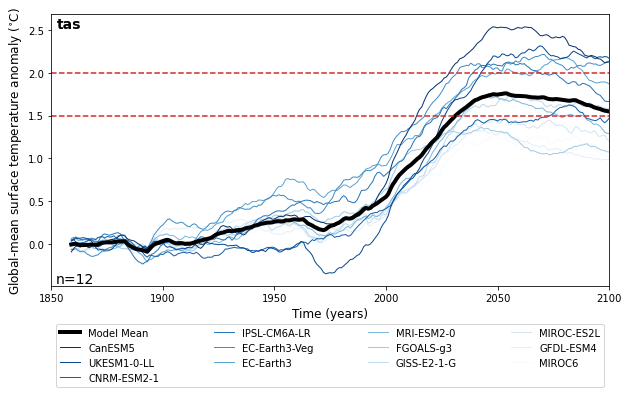

In [143]:
fig,ax = plt.subplots(figsize=(10,5))

gsat12_roll.plot(linewidth=1, label='MIROC6')
gsat11_roll.plot(linewidth=1, label='GFDL-ESM4')
gsat10_roll.plot(linewidth=1, label='MIROC-ES2L')
gsat9_roll.plot(linewidth=1, label='GISS-E2-1-G') 
gsat8_roll.plot(linewidth=1, label='FGOALS-g3') 
gsat7_roll.plot(linewidth=1, label='MRI-ESM2-0')
gsat6_roll.plot(linewidth=1, label='EC-Earth3')
gsat5_roll.plot(linewidth=1, label='EC-Earth3-Veg')
gsat4_roll.plot(linewidth=1, label='IPSL-CM6A-LR')
gsat3_roll.plot(linewidth=1, label='CNRM-ESM2-1')
gsat2_roll.plot(linewidth=1, label='UKESM1-0-LL')
gsat1_roll.plot(linewidth=1, label='CanESM5')

modelmean.plot(linewidth=4, color= 'black', label= 'Model Mean')


#add colors
N = 12
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,N)))

# set titel and name for axes
#plt.title('tas', fontsize = 12, fontweight = 'bold')
ax.text(0.01, 0.95, 'tas', 
        transform=ax.transAxes, ha="left", fontsize= 14, fontweight = 'bold')
ax.text(0.009, 0.01, 'n=12', 
        transform=ax.transAxes, ha="left", fontsize= 14)
plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel(r'Global-mean surface temperature anomaly ($^{\circ}$C)', fontsize = 12)
plt.xlim([1850,2100])

# plotting legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(0, -0.12, 1, 0), loc="upper left", mode="expand", ncol=4, fancybox=True)
    
# adding horizontal lines 1.5°C and 2°C
plt.axhline(1.5, color='tab:red', linestyle='--', linewidth=1.5)
plt.axhline(2.0, color='tab:red', linestyle='--', linewidth=1.5)

plt.savefig("TimeSeriesMultiModelTempChanges.png", bbox_inches="tight")
plt.show();

In [144]:
max_tas = max(modelmean)  # Find the maximum y value
max_year = modelmean[modelmean.argmax()]  # Find the x value corresponding to the maximum y value
print (max_year, max_tas)

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.7598857, dtype=float32)
Coordinates:
    year     int64 2054 <xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(nan, dtype=float32)
Coordinates:
    year     int64 1850


In [118]:
modelmean.sel(year=slice('2049', '2059')).mean()

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.7449539, dtype=float32)

In [119]:
modelmean.sel(year=slice('2049', '2059'))

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' (year: 11)>
array([1.7472259, 1.744438 , 1.7499264, 1.7529093, 1.7584175, 1.7598857,
       1.7477689, 1.739078 , 1.7348729, 1.7299484, 1.7300223],
      dtype=float32)
Coordinates:
  * year     (year) int64 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059

In [125]:
modelmean.sel(year=slice('2081', '2100')).mean()

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.6206348, dtype=float32)

In [117]:
modelmean.sel(year=slice('2090', '2100'))

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' (year: 11)>
array([1.6238455, 1.6210934, 1.6133614, 1.5992278, 1.5897999, 1.5828652,
       1.5763592, 1.5650144, 1.5575209, 1.5521563, 1.5476097],
      dtype=float32)
Coordinates:
  * year     (year) int64 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100

In [116]:
modelmean.sel(year=slice('2090', '2100')).mean()

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.5844413, dtype=float32)

In [121]:
modelmean.sel(year=slice('2025','2035'))

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' (year: 11)>
array([1.3282793, 1.3638673, 1.3872179, 1.4157591, 1.4439193, 1.4680997,
       1.4968354, 1.520352 , 1.5429792, 1.5625067, 1.5817513],
      dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035

In [122]:
modelmean.sel(year=slice('2025','2035')).mean()

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.4646878, dtype=float32)

In [59]:
modelmean.sel(year=slice('2099', '2100'))

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' (year: 2)>
array([1.5521563, 1.5476097], dtype=float32)
Coordinates:
  * year     (year) int64 2099 2100

In [60]:
def minpass(mymarks, mypass):
    passed= [x for x in mymarks if x >= mypass]
    min_value = passed[0]
    for x in passed: 
        if x < min_value:
            min_value = x
    return min_value

x = modelmean 
y = 1.5

minpass(x, y)

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.520352, dtype=float32)
Coordinates:
    year     int64 2032

# Plotting Maps of hottest model in ssp119: CanESM5

In [145]:
# Selecting model out of dictionary
ssp_hot1 = tas_dict[list(tas_dict.keys())[0]]
ssp_hot1.attrs['parent_source_id']

'CanESM5'

In [147]:
# check units
ssp_hot1.tas.attrs['units']

'K'

In [148]:
# convert units to Celcius
ssp_hot1.tas.data = ssp_hot1.tas.data - 273.15
ssp_hot1.tas.attrs['units'] = 'Celcius'
ssp_hot1.tas.attrs['units']

'Celcius'

In [149]:
# display years in this dataset
print(ssp_hot1.tas.time)

<xarray.DataArray 'time' (time: 3012)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


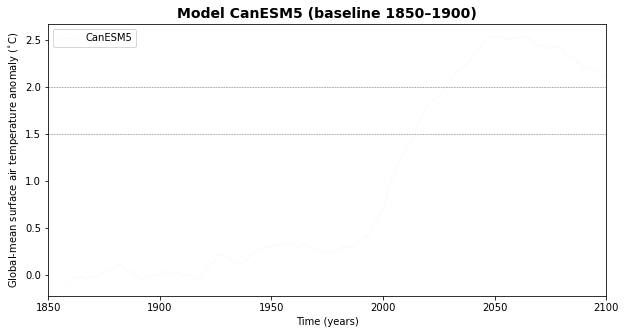

In [150]:
plt.figure(figsize=(10,5))

gsat1_roll.plot(linewidth=1, label='CanESM5')

# set titel and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_hot1.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean surface air temperature anomaly ($^{\circ}$C)')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
    
# adding horizontal lines 1.5°C and 2°C
plt.axhline(1.5, color='dimgrey', linestyle='--', linewidth=0.5)
plt.axhline(2.0, color='dimgrey', linestyle='--', linewidth=0.5)

plt.savefig("CanESM5 Time Series Temperature.png")
plt.show();

## Plotting CanESM5 at time of temperature 1.5°C

In [151]:
def minpass(mymarks, mypass):
    passed= [x for x in mymarks if x >= mypass]
    min_value = passed[0]
    for x in passed: 
        if x < min_value:
            min_value = x
    return min_value

x = gsat1_roll 
y = 1.5

pass_min = minpass(x, y)
print(pass_min)

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.5162565, dtype=float32)
Coordinates:
    year     int64 2014


In [152]:
minyear=pass_min.year.values - 5
maxyear=pass_min.year.values + 5
min_max = '%s - %s' %(minyear, maxyear)
min_max

'2009 - 2019'

In [153]:
temperature_change = (
    ssp_hot1['tas'].sel(time=slice('2009', '2019')).mean(dim='time') -
    ssp_hot1['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot1.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

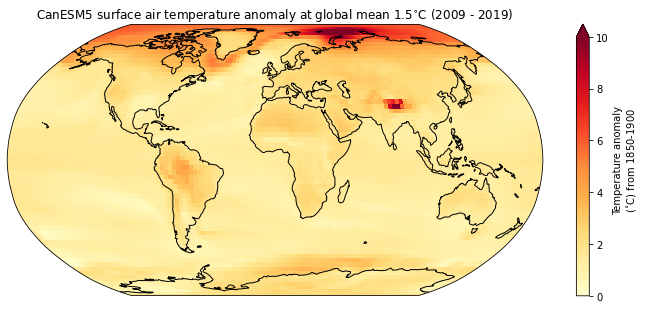

In [154]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()
#Add title with the model name
title = '%s surface air temperature anomaly at global mean 1.5$^{\circ}$C (%s)' %(ssp_hot1.attrs['parent_source_id'], min_max)
plt.title(title);
#save figure
plt.savefig("CanESM5 Anomaly 1.5C Global Map.png")

## Plotting CanESM5 at time of temperature 2.0°C

In [26]:
def minpass(mymarks, mypass):
    passed= [x for x in mymarks if x >= mypass]
    min_value = passed[0]
    for x in passed: 
        if x < min_value:
            min_value = x
    return min_value

x = gsat1_roll 
y = 2.0

pass_min = minpass(x, y)
print(pass_min)

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(2.0306323, dtype=float32)
Coordinates:
    year     int64 2029


In [27]:
minyear=pass_min.year.values - 5
maxyear=pass_min.year.values + 5
min_max = '%s - %s' %(minyear, maxyear)
min_max

'2024 - 2034'

In [28]:
temperature_change = (
    ssp_hot1['tas'].sel(time=slice('2024','2034')).mean(dim='time') -
    ssp_hot1['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot1.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

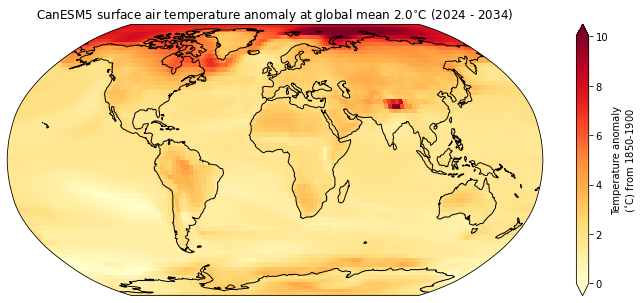

In [29]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()
#Add title with the model name
title = '%s surface air temperature anomaly at global mean 2.0$^{\circ}$C (%s)' %(ssp_hot1.attrs['parent_source_id'], min_max)
plt.title(title);
#save figure
plt.savefig("CanESM5 Temp Anomaly 2.0 Global Map.png")

## Plotting CanESM5 at end-of-century wrt to pre-industrial

In [30]:
temperature_change = (
    ssp_hot1['tas'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_hot1['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot1.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

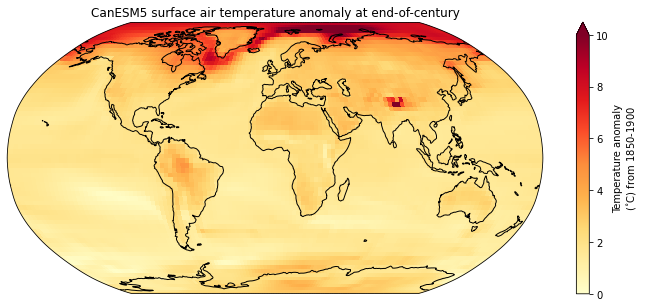

In [31]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s surface air temperature anomaly at end-of-century (2080-2100)' %(ssp_hot1.attrs['parent_source_id'])
plt.title(title);

#save figure
plt.savefig("CanESM5 Temp Anomaly Endofcentury Global Map.png")

# Plotting Maps of hottest model in ssp119: UKESM1-0-LL 

In [155]:
# Selecting model out of dictionary
ssp_hot2 = tas_dict[list(tas_dict.keys())[1]]
ssp_hot2.attrs['parent_source_id']

'UKESM1-0-LL'

In [156]:
# check units
ssp_hot2.tas.attrs['units']

'K'

In [157]:
# convert units to Celcius
ssp_hot2.tas.data = ssp_hot2.tas.data - 273.15
ssp_hot2.tas.attrs['units'] = 'Celcius'
ssp_hot2.tas.attrs['units']

'Celcius'

In [158]:
# display years in this dataset
print(ssp_hot2.tas.time)

<xarray.DataArray 'time' (time: 3012)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


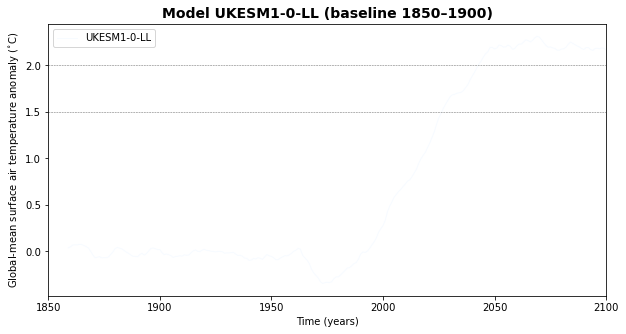

In [159]:
plt.figure(figsize=(10,5))

gsat2_roll.plot(linewidth=1, label='UKESM1-0-LL')

# set titel and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_hot2.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean surface air temperature anomaly ($^{\circ}$C)')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
    
# adding horizontal lines 1.5°C and 2°C
plt.axhline(1.5, color='dimgrey', linestyle='--', linewidth=0.5)
plt.axhline(2.0, color='dimgrey', linestyle='--', linewidth=0.5)

plt.savefig("UKESM1-0-LL Time Series Temperature.png")
plt.show();

## Plotting UKESM1-0-LL at time of temperature 1.5°C

In [160]:
def minpass(mymarks, mypass):
    passed= [x for x in mymarks if x >= mypass]
    min_value = passed[0]
    for x in passed: 
        if x < min_value:
            min_value = x
    return min_value

x = gsat2_roll 
y = 1.5

pass_min = minpass(x, y)
print(pass_min)

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(1.5371305, dtype=float32)
Coordinates:
    year     int64 2027


In [161]:
minyear=pass_min.year.values - 5
maxyear=pass_min.year.values + 5
min_max = '%s - %s' %(minyear, maxyear)
min_max

'2022 - 2032'

In [162]:
temperature_change = (
    ssp_hot2['tas'].sel(time=slice('2022','2032')).mean(dim='time') -
    ssp_hot2['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot2.attrs)
temperature_change = temperature_change.rename(
    r'Δ Temperature ($^{\circ}$C)'
)

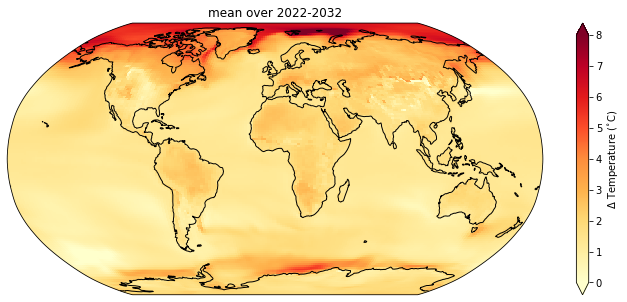

In [165]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=8)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()
#Add title with the model name
title = 'mean over 2022-2032' 
plt.title(title);
#save figure
plt.savefig("UKESM1-0-LL Temp Anomaly 1.5C Global Map.png")

## Plotting UKESM1-0-LL at time of temperature 2.0°C

In [41]:
def minpass(mymarks, mypass):
    passed= [x for x in mymarks if x >= mypass]
    min_value = passed[0]
    for x in passed: 
        if x < min_value:
            min_value = x
    return min_value

x = gsat2_roll 
y = 2.0

pass_min = minpass(x, y)
print(pass_min)

<xarray.DataArray 'tas anomaly (relative to 1850-1900)' ()>
array(2.0175688, dtype=float32)
Coordinates:
    year     int64 2043


In [42]:
minyear=pass_min.year.values - 5
maxyear=pass_min.year.values + 5
min_max = '%s - %s' %(minyear, maxyear)
min_max

'2038 - 2048'

In [43]:
temperature_change = (
    ssp_hot2['tas'].sel(time=slice('2038','2048')).mean(dim='time') -
    ssp_hot2['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot2.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

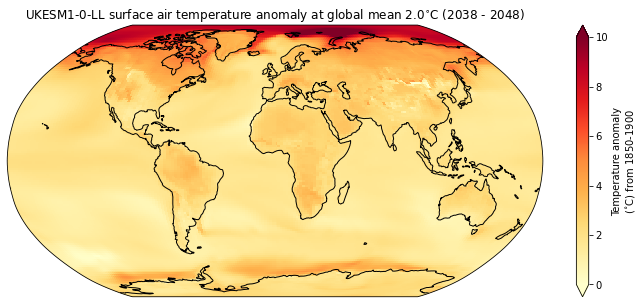

In [44]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()
#Add title with the model name
title = '%s surface air temperature anomaly at global mean 2.0$^{\circ}$C (%s)' %(ssp_hot2.attrs['parent_source_id'], min_max)
plt.title(title);
#save figure
plt.savefig("UKESM1-0-LL Temp Anomaly 2.0C Global Map.png")

## Plotting UKESM1-0-LL at end-of-century wrt to pre-industrial

In [45]:
temperature_change = (
    ssp_hot2['tas'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_hot2['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot2.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

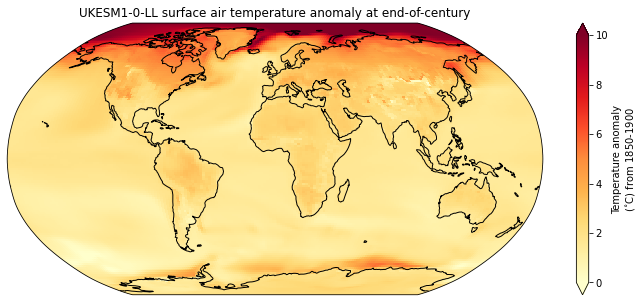

In [46]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s surface air temperature anomaly at end-of-century' %(ssp_hot2.attrs['parent_source_id'])
plt.title(title);

#save figure
plt.savefig("UKESM1-0-LL Temp Anomaly Endofcentury Global Map.png")

# Plotting Maps of cold model in ssp119: MIROC-ES2L

In [63]:
# Selecting Model out of dictionary
ssp_cold1 = tas_dict[list(tas_dict.keys())[7]]
ssp_cold1.attrs['parent_source_id']

'MIROC-ES2L'

In [64]:
# check units
ssp_cold1.tas.attrs['units']

'Celcius'

In [65]:
# convert units to Celcius
ssp_cold1.tas.data = ssp_cold1.tas.data - 273.15
ssp_cold1.tas.attrs['units'] = 'Celcius'
ssp_cold1.tas.attrs['units']

'Celcius'

In [66]:
# display years in this dataset
print(ssp_cold1.tas.time)

<xarray.DataArray 'time' (time: 3012)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [67]:
tas = ssp_cold1.tas
tas.shape

(3012, 64, 128)

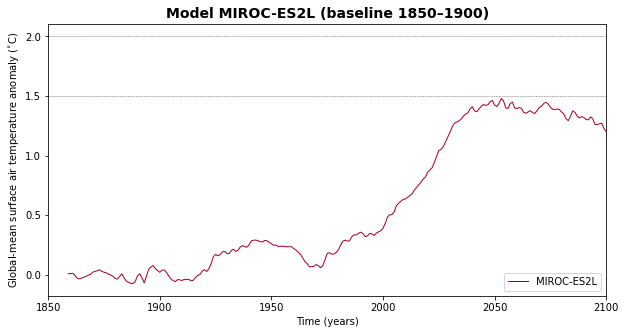

In [68]:
plt.figure(figsize=(10,5))

gsat9_roll.plot(linewidth=1, label='%s' %(ssp_cold1.attrs['parent_source_id']))

# set titel and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_cold1.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean surface air temperature anomaly ($^{\circ}$C)')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
    
# adding horizontal lines 1.5°C and 2°C
plt.axhline(1.5, color='dimgrey', linestyle='--', linewidth=0.5)
plt.axhline(2.0, color='dimgrey', linestyle='--', linewidth=0.5)
plt.savefig("MIROC-ES2L Time Series Temperature.png")

plt.show();

## Plotting MIROC-ES2L at end-of-century wrt to pre-industrial

In [69]:
temperature_change = (
    ssp_cold1['tas'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_cold1['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_cold1.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

In [ ]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s surface air temperature anomaly at end-of-century' %(ssp_cold1.attrs['parent_source_id'])
plt.title(title);

#save figure
plt.savefig("MIROC-ES2L Temp Anomaly Endofcentury Global Map.png")

# Plotting Maps of cold model in ssp119: GISS-E2-1-G

In [55]:
# Selecting CanESM5 out of dictionary
ssp_cold2 = tas_dict[list(tas_dict.keys())[5]]
ssp_cold2.attrs['parent_source_id']

'GISS-E2-1-G'

In [56]:
# check units
ssp_cold2.tas.attrs['units']

'K'

In [57]:
# convert units to Celcius
ssp_cold2.tas.data = ssp_cold2.tas.data - 273.15
ssp_cold2.tas.attrs['units'] = 'Celcius'
ssp_cold2.tas.attrs['units']

'Celcius'

In [58]:
tas = ssp_cold2.tas
tas.shape

(3012, 90, 144)

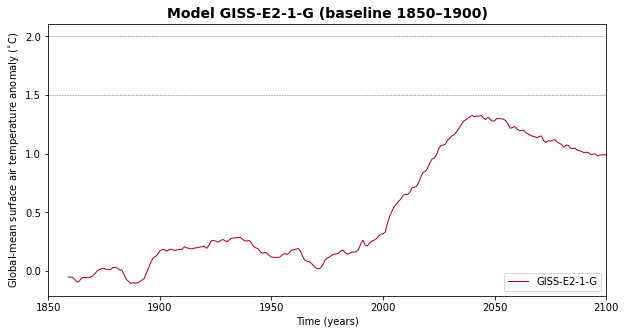

In [59]:
plt.figure(figsize=(10,5))

gsat11_roll.plot(linewidth=1, label='%s' %(ssp_cold2.attrs['parent_source_id']))

# set titel and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_cold2.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean surface air temperature anomaly ($^{\circ}$C)')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
    
# adding horizontal lines 1.5°C and 2°C
plt.axhline(1.5, color='dimgrey', linestyle='--', linewidth=0.5)
plt.axhline(2.0, color='dimgrey', linestyle='--', linewidth=0.5)

#plt.savefig("GISS-E2-1-G Time Series Temperature.png")

plt.show();

## Plotting GISS-E2-1-G at end-of-century wrt to pre-industrial

In [60]:
ssp_cold2.attrs['parent_source_id']

'GISS-E2-1-G'

In [61]:
temperature_change = (
    ssp_cold2['tas'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_cold2['tas'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
temperature_change.attrs.update(ssp_hot2.attrs)
temperature_change = temperature_change.rename(
    r'Temperature anomaly ($^{\circ}$C) from 1850-1900'
)

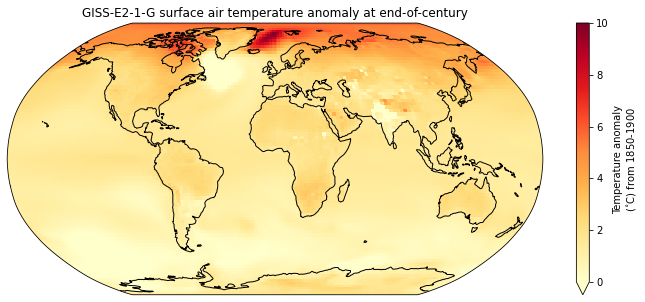

In [62]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s surface air temperature anomaly at end-of-century' %(sp_cold2.attrs['parent_source_id'])
plt.title(title);

#save figure
#plt.savefig("GISS-E2-1-G Temp Anomaly Endofcentury Global Map.png")